In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv ('marketing_campaign_data.csv')
df.head().transpose()

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
ID,5524,2174,4141,6182,5324
Year_Birth,1957,1954,1965,1984,1981
Education,S1,S1,S1,S1,S3
Marital_Status,Lajang,Lajang,Bertunangan,Bertunangan,Menikah
Income,58138000.0,46344000.0,71613000.0,26646000.0,58293000.0
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Dt_Customer,04-09-2012,08-03-2014,21-08-2013,10-02-2014,19-01-2014
Recency,58,38,26,26,94


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [33]:
df.isna().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [34]:
df.shape

(2240, 30)

### Feature Engineering

In [35]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

df['Age'] = 2022 - df['Year_Birth']
df['Join_at_age'] = df['Dt_Customer'].dt.year - df['Year_Birth']
df['Total_kids'] = df['Kidhome'] + df['Teenhome']
df['is_parents'] = np.where(df['Total_kids'] > 0, 1, 0)
df['Marital_Status'] = df['Marital_Status'].replace({'Lajang' : 'Single', 'Menikah' : 'Couple', 'Janda' : 'Single', 'Duda' : 'Single', 'Cerai' : 'Divorced', 'Bertunangan' : 'Couple'})

# group age range
df.loc[(df['Age'] >= 0) & (df['Age'] < 12), 'Age_range'] = 'Child'
df.loc[(df['Age'] >= 12) & (df['Age'] < 18), 'Age_range'] = 'Teens'
df.loc[(df['Age'] >= 18) & (df['Age'] < 36), 'Age_range'] = 'Young adults'
df.loc[(df['Age'] >= 36) & (df['Age'] < 55), 'Age_range'] = 'Middle age adults'
df.loc[(df['Age'] >= 55), 'Age_range'] = 'Older adults'

# total spending
df['Total_spending'] = df['MntCoke']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

# total accept campaign
df['Total_accept_campaign'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']

# total transcation purchased 
df['Total_transactions'] = df['NumCatalogPurchases'] + df['NumDealsPurchases'] + df['NumStorePurchases'] + df['NumWebPurchases']

def safe_div(x,y):
    if y == 0:
        return 0
    return x / y
# conversion rate
df['Conversion_rate'] = df.apply(lambda x: safe_div(x['Total_transactions'],x['NumWebVisitsMonth']), axis=1)

C:\Users\hesti media tama\AppData\Local\Temp\ipykernel_1388\3705926734.py:1: UserWarning: Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\hesti media tama\AppData\Local\Temp\ipykernel_1388\3705926734.py:1: UserWarning: Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\hesti media tama\AppData\Local\Temp\ipykernel_1388\3705926734.py:1: UserWarning: Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\hesti media tama\AppData\Local\Temp\ipykernel_1388\3705926734.py:1: UserWarning: Parsing '13-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent p

### Exploratory Data Analysis: conversion rate based on income, spending, and age

In [36]:
category = df.select_dtypes(include='object')
numerical = df.select_dtypes(exclude='object')

numerical_cols = numerical.columns.to_list()
category_cols = category.columns.to_list()

print("Data numerik: ", numerical_cols)
print("Data category: ", category_cols)

Data numerik:  ['Unnamed: 0', 'ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Join_at_age', 'Total_kids', 'is_parents', 'Total_spending', 'Total_accept_campaign', 'Total_transactions', 'Conversion_rate']
Data category:  ['Education', 'Marital_Status', 'Age_range']


In [37]:
# Numeric Feature
df[numerical_cols].describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,...,Z_Revenue,Response,Age,Join_at_age,Total_kids,is_parents,Total_spending,Total_accept_campaign,Total_transactions,Conversion_rate
count,2240.000000,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,...,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000
mean,1119.500000,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,...,11.0,0.149107,53.194196,44.222321,0.950446,0.715179,6.057982e+05,0.297768,14.862054,4.395222
std,646.776623,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,...,0.0,0.356274,11.984069,12.022855,0.751803,0.451430,6.022493e+05,0.678381,7.677173,4.913624
min,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,...,11.0,0.000000,26.000000,16.000000,0.000000,0.000000,5.000000e+03,0.000000,0.000000,0.000000
25%,559.750000,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,...,11.0,0.000000,45.000000,36.000000,0.000000,0.000000,6.875000e+04,0.000000,8.000000,1.222222
50%,1119.500000,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,...,11.0,0.000000,52.000000,43.000000,1.000000,1.000000,3.960000e+05,0.000000,15.000000,2.600000
75%,1679.250000,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,...,11.0,0.000000,63.000000,54.000000,1.000000,1.000000,1.045500e+06,0.000000,21.000000,5.350000
max,2239.000000,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,...,11.0,1.000000,129.000000,121.000000,3.000000,1.000000,2.525000e+06,4.000000,44.000000,43.000000


In [38]:
# Categorical Feature
df[category_cols].describe()

,Education,Marital_Status,Age_range
count,2240,2240,2240
unique,5,3,3
top,S1,Couple,Middle age adults
freq,1127,1444,1139


<AxesSubplot:>

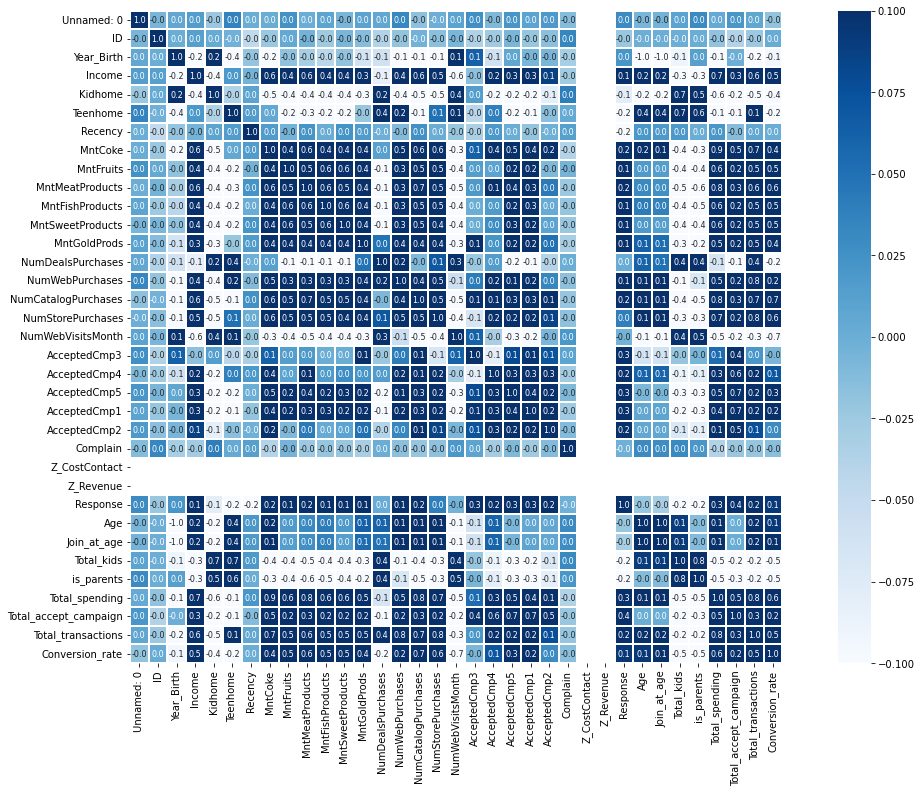

In [39]:
# Corelassion Heatmap
plt.figure(figsize=(20, 12))
corrmat = df.corr()
sns.heatmap(corrmat, cmap='Blues', annot=True, fmt='.1f',
           vmin=corrmat.values.min(), vmax=1, square=True, linewidths=0.1, annot_kws={"fontsize":8})

- Fitur conversion rate memiliki korelasi kuat positif terhadap fitur income, total_spending dan total_transactions
- Fitur conversion rate memiliki korelasi lemah positif terhadap age

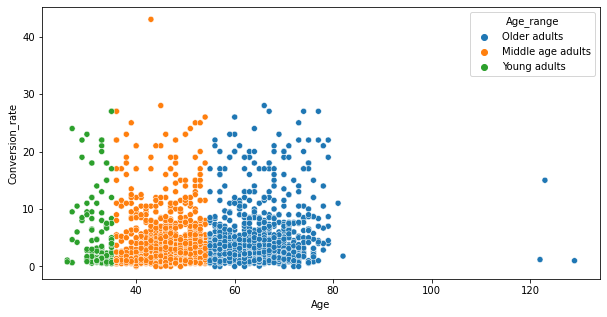

In [40]:
## Correlation Conversion Rate with age
fig, (ax1) = plt.subplots(figsize=(10,5))
sns.scatterplot(x = 'Age', y= 'Conversion_rate', hue='Age_range', data=df);

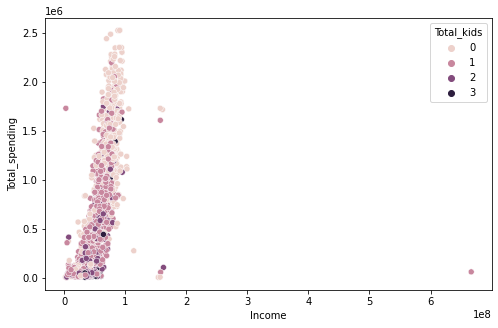

In [41]:
## Correlation total spending & income with total kids
fig, (ax1) = plt.subplots(figsize=(8,5))

sns.scatterplot(x="Income",y="Total_spending",data=df, hue='Total_kids');

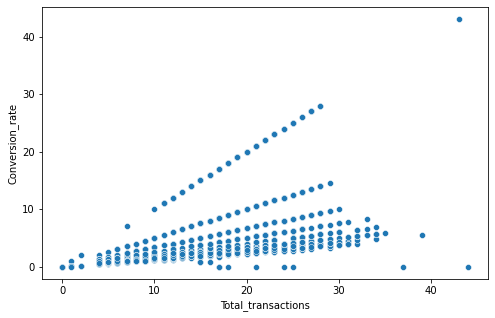

In [42]:
## Correlation total transactions & conversion rate 
fig, (ax1) = plt.subplots(figsize=(8,5))

sns.scatterplot(x="Total_transactions",y="Conversion_rate",data=df);

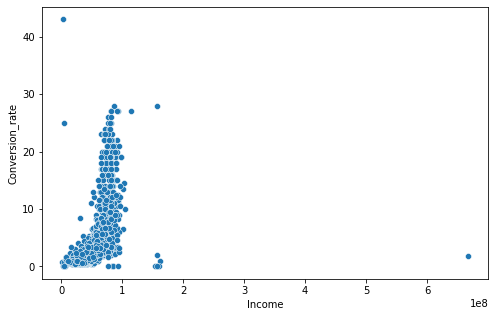

In [43]:
## Correlation conversion rate & income with total kids
fig, (ax1) = plt.subplots(figsize=(8,5))

sns.scatterplot(x="Income",y="Conversion_rate",data=df);

### Data Processing

In [44]:
#check data duplicate
df.duplicated().sum()

0

In [45]:
#check data null
df.isna().sum()

Unnamed: 0                0
ID                        0
Year_Birth                0
Education                 0
Marital_Status            0
Income                   24
Kidhome                   0
Teenhome                  0
Dt_Customer               0
Recency                   0
MntCoke                   0
MntFruits                 0
MntMeatProducts           0
MntFishProducts           0
MntSweetProducts          0
MntGoldProds              0
NumDealsPurchases         0
NumWebPurchases           0
NumCatalogPurchases       0
NumStorePurchases         0
NumWebVisitsMonth         0
AcceptedCmp3              0
AcceptedCmp4              0
AcceptedCmp5              0
AcceptedCmp1              0
AcceptedCmp2              0
Complain                  0
Z_CostContact             0
Z_Revenue                 0
Response                  0
Age                       0
Join_at_age               0
Total_kids                0
is_parents                0
Age_range                 0
Total_spending      

In [46]:
#check missing persen
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_percentage(df)

,Total,Percent
Income,24,1.07


In [47]:
#drop missing value income because under 5%
df= df.dropna()

In [48]:
# label encoder for education
mapping_education = {
    'SMA' : 0,
    'D3' : 1,
    'S1' : 2,
    'S2' : 3,
    'S3' : 4
}
df['Education_mapped'] = df['Education'].map(mapping_education)

In [49]:
dataset_categorical = df[['Education']].copy()

In [50]:
# One hot encoder
for cat in ['Marital_Status', 'Age_range', 'is_parents']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    dataset_categorical = dataset_categorical.join(onehots)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             2216 non-null   int64         
 1   ID                     2216 non-null   int64         
 2   Year_Birth             2216 non-null   int64         
 3   Education              2216 non-null   object        
 4   Marital_Status         2216 non-null   object        
 5   Income                 2216 non-null   float64       
 6   Kidhome                2216 non-null   int64         
 7   Teenhome               2216 non-null   int64         
 8   Dt_Customer            2216 non-null   datetime64[ns]
 9   Recency                2216 non-null   int64         
 10  MntCoke                2216 non-null   int64         
 11  MntFruits              2216 non-null   int64         
 12  MntMeatProducts        2216 non-null   int64         
 13  Mnt

In [52]:
df = df.drop(columns=['Unnamed: 0','ID', 'Recency', 'Year_Birth', 'Z_CostContact', 'Z_Revenue', 'Dt_Customer', 'AcceptedCmp3','AcceptedCmp2', 'AcceptedCmp1', 'AcceptedCmp4', 'AcceptedCmp5'])

In [53]:
category = df.select_dtypes(include='object')
numerical = df.select_dtypes(exclude='object')

numerical_cols = numerical.columns.to_list()
category_cols = category.columns.to_list()

print("Data numerik: ", numerical_cols)
print("Data category: ", category_cols)

Data numerik:  ['Income', 'Kidhome', 'Teenhome', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response', 'Age', 'Join_at_age', 'Total_kids', 'is_parents', 'Total_spending', 'Total_accept_campaign', 'Total_transactions', 'Conversion_rate', 'Education_mapped']
Data category:  ['Education', 'Marital_Status', 'Age_range']


In [54]:
from sklearn.preprocessing import StandardScaler
df_scaled = df.copy()
ss = StandardScaler()

for col in numerical_cols:
    df_scaled[col] = ss.fit_transform(df_scaled[[col]])
    
display(df_scaled.shape, df_scaled.head())

(2216, 28)

,Education,Marital_Status,Income,Kidhome,Teenhome,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Age,Join_at_age,Total_kids,is_parents,Age_range,Total_spending,Total_accept_campaign,Total_transactions,Conversion_rate,Education_mapped
0,S1,Single,0.234063,-0.823039,-0.928972,0.978226,1.549429,1.690227,2.454568,1.484827,...,0.986443,0.897752,-1.264803,-1.581389,Older adults,1.675488,-0.439265,1.319446,-0.167630,-0.457733
1,S1,Single,-0.234559,1.039938,0.909066,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,...,1.236801,1.313688,1.405806,0.632356,Older adults,-0.962358,-0.439265,-1.157987,-0.652811,-0.457733
2,S1,Couple,0.769478,-0.823039,-0.928972,0.358511,0.569159,-0.178368,1.340203,-0.146821,...,0.318822,0.315443,-1.264803,-1.581389,Older adults,0.280250,-0.439265,0.797881,0.175797,-0.457733
3,S1,Couple,-1.017239,1.039938,-0.928972,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,...,-1.266777,-1.181925,0.070501,0.632356,Middle age adults,-0.919224,-0.439265,-0.897205,-0.625532,-0.457733
4,S3,Couple,0.240221,1.039938,-0.928972,-0.391671,0.418348,-0.218505,0.152766,-0.000703,...,-1.016420,-0.932363,0.070501,0.632356,Middle age adults,-0.307044,-0.439265,0.537099,-0.120865,1.533113


### Modeling

In [55]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Education              2216 non-null   object 
 1   Marital_Status         2216 non-null   object 
 2   Income                 2216 non-null   float64
 3   Kidhome                2216 non-null   float64
 4   Teenhome               2216 non-null   float64
 5   MntCoke                2216 non-null   float64
 6   MntFruits              2216 non-null   float64
 7   MntMeatProducts        2216 non-null   float64
 8   MntFishProducts        2216 non-null   float64
 9   MntSweetProducts       2216 non-null   float64
 10  MntGoldProds           2216 non-null   float64
 11  NumDealsPurchases      2216 non-null   float64
 12  NumWebPurchases        2216 non-null   float64
 13  NumCatalogPurchases    2216 non-null   float64
 14  NumStorePurchases      2216 non-null   float64
 15  NumW

[39552.33691134789, 34430.83699023504, 32103.361395378186, 30071.363250919854, 29421.293410836242, 28009.638551019474, 26254.611129988403, 25392.993452769606, 24515.65248972759, 23773.422358638727, 23314.471282131548, 22939.472304039344, 22557.73615935808, 21967.474550853018]


<AxesSubplot:title={'center':'Elbow Method of K-means Clustering'}>

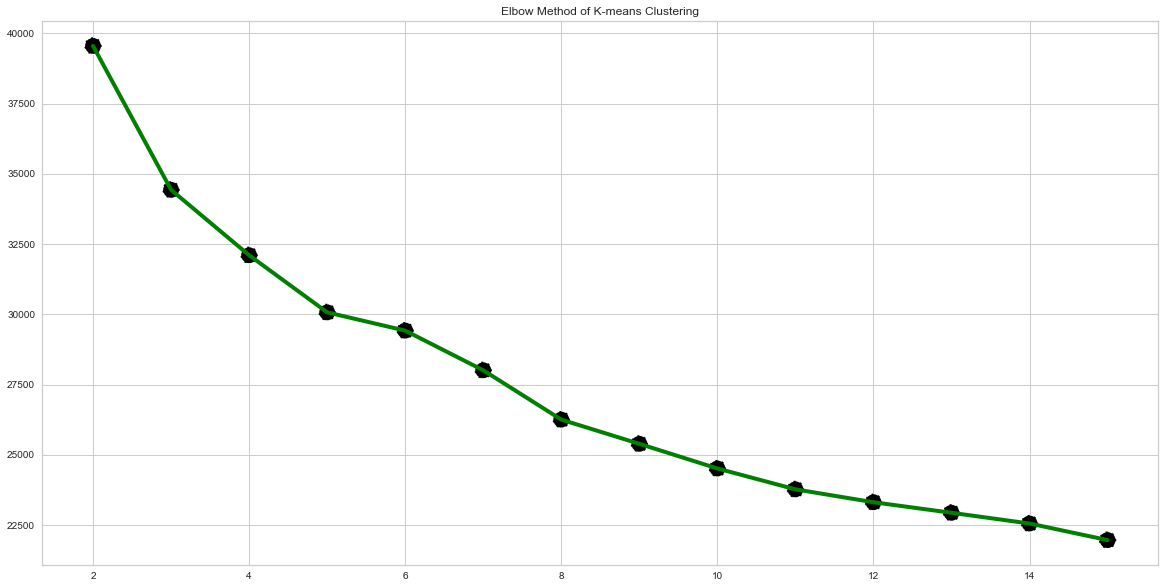

In [82]:
from sklearn.cluster import KMeans
X = df_scaled.drop(columns=[ 'Education', 'Marital_Status', 'Age_range']).copy()
inertia = []

for i in range(2, 16):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X.values)
    inertia.append(kmeans.inertia_)

print(inertia)
plt.figure(figsize=(20, 10))
plt.title('Elbow Method of K-means Clustering')
# plt.plot(inertia)

sns.lineplot(x=range(2, 16), y=inertia, color='green', linewidth = 4)
sns.scatterplot(x=range(2, 16), y=inertia, s=300, color='black',  linestyle='--')

In [85]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X.values)
X['cluster'] = kmeans.labels_
df['cluster'] = kmeans.labels_

<AxesSubplot:xlabel='Total_spending', ylabel='Income'>

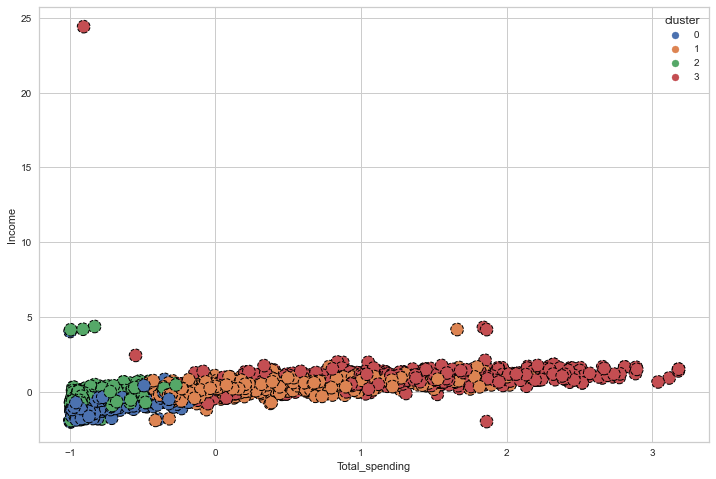

In [86]:
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(
    x='Total_spending', y='Income',
    hue='cluster',
    edgecolor='black',
    linestyle='--',
    data=X,
    palette="deep",
    s=160,
    ax=ax
)

In [87]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=42)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='RdYlGn')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()

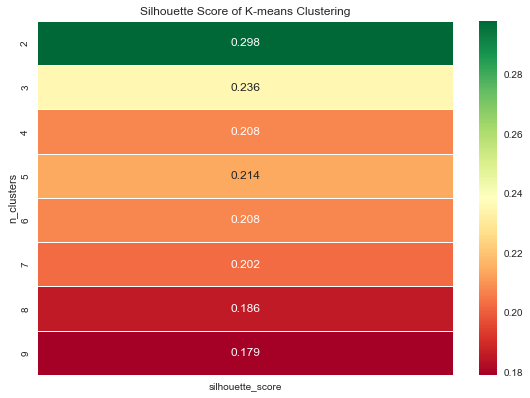

In [88]:
visualize_silhouette_layer(X)

In [89]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Join_at_age,Total_kids,is_parents,Age_range,Total_spending,Total_accept_campaign,Total_transactions,Conversion_rate,Education_mapped,cluster
0,S1,Single,58138000.0,0,0,635000,88000,546000,172000,88000,...,55,0,0,Older adults,1617000,0,25,3.571429,2,3
1,S1,Single,46344000.0,1,1,11000,1000,6000,2000,1000,...,60,2,1,Older adults,27000,0,6,1.200000,2,2
2,S1,Couple,71613000.0,0,0,426000,49000,127000,111000,21000,...,48,0,0,Older adults,776000,0,21,5.250000,2,3
3,S1,Couple,26646000.0,1,0,11000,4000,20000,10000,3000,...,30,1,1,Middle age adults,53000,0,8,1.333333,2,0
4,S3,Couple,58293000.0,1,0,173000,43000,118000,46000,27000,...,33,1,1,Middle age adults,422000,0,19,3.800000,4,1


In [91]:
df_group_cluster = df.groupby(['cluster']).agg({'Total_spending': ['count', 'mean', 'median', 'min', 'max'],
                                                'Income':['count', 'mean', 'median', 'min', 'max']})
df_group_cluster

Total_spending                                           Income  \
                 count          mean     median     min      max  count   
cluster                                                                   
0                  598  1.054247e+05    63000.0    5000   680000    598   
1                  588  8.654201e+05   817000.0  322000  2092000    588   
2                  528  1.349602e+05    90500.0    8000   459000    528   
3                  502  1.398624e+06  1377000.0   62000  2525000    502   

                                                           
                 mean      median        min          max  
cluster                                                    
0        2.996666e+07  29760000.0  1730000.0  153924000.0  
1        6.138230e+07  61338500.0  4428000.0  157243000.0  
2        4.314180e+07  42935000.0  4023000.0  162397000.0  
3        7.766570e+07  77320000.0  2447000.0  666666000.0